In [1]:
import numpy as np

class Graph:
    #TODO implement 8-point connectivity
    def __init__(self, pixel, goal, value, g=0, parent=None):
        self.pixel = pixel
        self.goal = goal
        self.parent = parent
        self.neighbors = {'u' : None, #up
                          'l' : None, #left
                          'd' : None, #down
                          'r' : None  #right
                          }
        self.h = self.heuristic()
        self.g = g
        self.obstacle = value
        self.f = self.h + self.g + 1e4 * self.obstacle
    
    def heuristic(self):
        pixel_arr = np.array(self.pixel)
        goal_arr = np.array(self.goal)
        return np.linalg.norm(goal_arr - pixel_arr)

    def add_neighbor(self, loc, npixel, nvalue):
        self.neighbors[loc] = Graph(npixel, self.goal, nvalue, g=self.g+1, parent=self)


In [203]:
a = Graph((1, 1), (2, 2), 0)
a.add_neighbor('u', (1, 2), 0)

In [204]:
a.neighbors['u'].g

1

In [48]:
#TODO check if x, y needs to be reversed
class A_star:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.shape = grid.shape
        self.start = start
        self.goal = goal
        self.graph = Graph(start, goal, grid[start[0], start[1]])
        self.O = [] # priority queue
        self.C = set() # visited nodes
        self.T = []
        self.path = None

    def _gen_path(self, node):
        curr = node
        order = []
        while curr:
            order.append(curr.pixel)
            curr = curr.parent
        self.path = order[::-1]
    
    def run(self):
        self.O.append(self.graph)
        tt = 0
        test = set()
        #ncurr = self.graph
        #self.C.append(self.graph)

        #while ncurr.pixel != self.goal:
        while self.O:
            ncurr = self.O.pop()
            self.T.append(ncurr)
            if ncurr.pixel in test:
                print(tt)
                print(test)
            test.add(ncurr.pixel)

            if ncurr.pixel == self.goal:
                #self.C.append(ncurr)
                self.O = list(filter(lambda x: x.f < ncurr.g, self.O))
            
            elif ncurr not in self.C:
                #self.C.append(ncurr)
                self.C.add(ncurr.pixel)
                if not ncurr.pixel[0] % 1:
                    pass
                    #print(ncurr.pixel, end='::')
                    #print(len(self.C), len(self.O), end=' >< ')
                for i, loc in enumerate(ncurr.neighbors.keys()):
                    move = (-1)**(0 < i < 3) * np.array([0**((i + 1) % 2), 0**(i % 2)]) # x,y
                    #move = (-1)**(0 < i < 3) * np.array([-0**(i % 2), 0**((i + 1) % 2)])  # y, x
                    next_pixel = tuple(np.array(ncurr.pixel) + move)
                    #C_pxs = [node.pixel for node in self.C]
                    O_pxs = [node.pixel for node in self.O]

                    if (next_pixel not in self.C) and (next_pixel not in O_pxs):
                        if (next_pixel[0] >= 0 and next_pixel[1] >= 0) and (next_pixel[0] < self.shape[0] 
                            and next_pixel[1] < self.shape[1]):
                                nvalue = self.grid[next_pixel[0], next_pixel[1]]
                                ncurr.add_neighbor(loc, next_pixel, nvalue)
                                self.O.append(ncurr.neighbors[loc])
                
                self.O.sort(key=lambda x : x.f, reverse=True)
                if tt == 0:
                    print([(node.pixel, node.f) for node in self.O])
            #ncurr = self.O.pop()
            tt += 1
        self._gen_path(ncurr)



In [287]:
grid = np.zeros((6,6))
goal = (5, 0)
start = (1, 5)
grid[0:4, 1:3] = 1
grid[4, 3] = 1
test = A_star(grid, (5,1), (0,5))

grid[0, 5] = 2
grid[5, 1] = 3
grid

array([[0., 1., 1., 0., 0., 2.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 3., 0., 0., 0., 0.]])

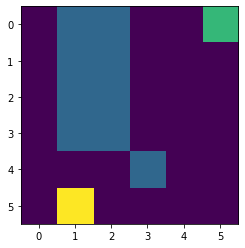

In [227]:
import matplotlib.pyplot as plt

plt.imshow(grid)
plt.show()

In [228]:
import cv2
cv2.transpose(grid)

array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 3.],
       [1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0.]])

In [288]:
test.run()

[((5, 0), 8.071067811865476), ((5, 2), 6.830951894845301), ((4, 1), 6.656854249492381)]


In [283]:
test.graph.neighbors['r'].neighbors['r'].neighbors['r'].g

3

In [279]:
ttt = test.T
a = list(filter(lambda x: x.f < 10, ttt))
print([n.pixel for n in a])
print()
print([n.pixel for n in ttt])

[(5, 1), (4, 1), (5, 2), (4, 2), (5, 3), (5, 0), (5, 4), (4, 4), (3, 4), (2, 4), (4, 0), (1, 4), (3, 0), (1, 5), (0, 4), (2, 5), (3, 5), (4, 5), (5, 5), (2, 0), (3, 3), (2, 3)]

[(5, 1), (4, 1), (5, 2), (4, 2), (5, 3), (5, 0), (5, 4), (4, 4), (3, 4), (2, 4), (4, 0), (1, 4), (3, 0), (1, 5), (0, 4), (2, 5), (3, 5), (4, 5), (5, 5), (2, 0), (3, 3), (2, 3), (1, 0), (1, 3), (0, 0), (0, 3), (3, 1), (3, 2), (4, 3), (2, 1), (1, 1), (0, 1), (2, 2), (1, 2), (0, 2), (0, 5)]


In [237]:
a = set()

(5,2) in a

False

In [183]:
print(test.graph.pixel)
for key, item in test.graph.neighbors.items():
    print(key, item)

(5, 1)
u <__main__.Graph object at 0x7f0164224c70>
l <__main__.Graph object at 0x7f0163ee9330>
d None
r <__main__.Graph object at 0x7f0163eeb040>


In [184]:
print(test.graph.neighbors['l'].f)
print(test.graph.neighbors['r'].f)

8.071067811865476
6.830951894845301


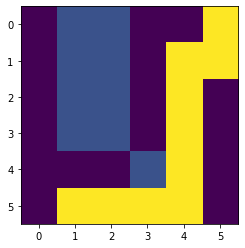

In [289]:
p = test.lastp
order = []
while p:
    order.append(p.pixel)
    grid[p.pixel] = 4
    p = p.parent
order[::-1]

plt.imshow(grid)
plt.show()

In [80]:
for i in range(1,6):
    print(f'5%{i} = ', 7%(i+1))

5%1 =  1
5%2 =  1
5%3 =  3
5%4 =  2
5%5 =  1


In [46]:
import os
import cv2

height, width = (16, 16) # in meters
scale = 28 # meters / pixel
def meters2pixels(coord):
    """Converts coordinate in meters to pixel coordinate.
    """
    xm, ym = coord
    xp = int(np.round(scale * (xm + width // 2)))
    yp = int(np.round(scale * (-ym + height // 2)))
    coord_pixels = (xp, yp)
    
    return coord_pixels

grid_path = os.path.join('catkin_ws/src/wavefront', 'worlds/grid1.npy')
grid = np.load(grid_path)
#grid = cv2.transpose(grid)

start = (-6, 2)
start_ = meters2pixels(start)
goal = (5, 2)
goal_ = meters2pixels(goal)
mapa = grid.copy()

mapa[goal_[1], goal_[0]] = 2
mapa[start_[1], start_[0]] = 3
grid


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint64)

In [33]:
grid = cv2.transpose(grid)
np.save('catkin_ws/src/Astar/worlds/grid1.npy', grid)
grid

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [29]:
grid = cv2.transpose(grid)

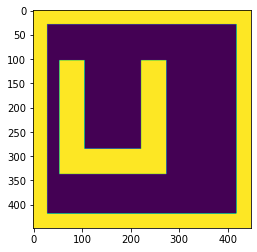

In [47]:
import matplotlib.pyplot as plt

plt.imshow(grid)
plt.show()

In [49]:
#test = A_star(grid, (start_[1],start_[0]), (goal_[1],goal_[0]))
test = A_star(grid, start_, goal_)
test.run()

[((55, 168), 310.0), ((56, 169), 309.00162337234525), ((56, 167), 309.00162337234525), ((57, 168), 308.0)]


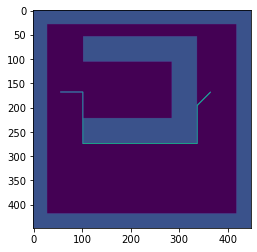

In [297]:
p = test.lastp
order = []
while p:
    order.append(p.pixel)
    mapa[p.pixel] = 4
    p = p.parent
#order[::-1]

plt.imshow(mapa)
plt.show()

In [52]:
import plotly.express as px
import plotly.graph_objects as go

a = np.array(list(map(list, zip(*test.path))))
fig = px.imshow(0**grid, binary_string=True)
fig.add_trace(go.Scatter(x=a[0,:].ravel(), y=a[1,:].ravel(), name='Caminho do Robô', showlegend=True))
fig.show()

In [43]:
import pandas as pd
df = pd.read_csv('/home/fbartelt/Documents/UFMG/Planejamento/logs/astar_path.csv', index_col=0)
df

0    1
0    168   56
1    168   57
2    168   58
3    168   59
4    168   60
..   ...  ...
516  170  362
517  170  363
518  169  363
519  169  364
520  168  364

[521 rows x 2 columns]

In [45]:
fig = px.imshow(0**grid, binary_string=True)
fig.add_trace(go.Scatter(x=df['1'], y=df['0'], name='Caminho do Robô', showlegend=True))
fig.show()

In [55]:
def pixels2meters(coord):
    """Converts pixels coordinate to coordinate in meters.
    """
    xp, yp = coord
    xm = xp / scale - width // 2
    ym = -yp / scale + height // 2
    coord_meters = (xm, ym)
    
    return coord_meters

pixels2meters((168, 56))

(-2.0, 6.0)

In [62]:
import time

a = time.time()
time.sleep(1.234)
b = time.time()
tt = b - a
m, s = divmod(tt, 60)
ss = '{:.2}min {:.2}s'.format(m, s)
print(ss)

0.0min 1.2s


In [63]:
mapa[None]

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]], dtype=uint64)

# Trapezoidal

In [32]:
height, width = (16, 16) # in meters
scale = 28 # meters / pixel

def meters2pixels(coord):
    """Converts coordinate in meters to pixel coordinate.
    """
    xm, ym = coord
    xp = int(np.round(scale * (xm + width // 2)))
    yp = int(np.round(scale * (-ym + height // 2)))
    coord_pixels = (xp, yp)
    
    return coord_pixels

def pixels2meters(coord):
    """Converts pixels coordinate to coordinate in meters.
    """
    xp, yp = coord
    xm = xp / scale - width // 2
    ym = -yp / scale + height // 2
    coord_meters = (xm, ym)
    
    return coord_meters

In [28]:
import plotly.express as px
import cv2
img = cv2.imread('trapz.png', cv2.IMREAD_GRAYSCALE)
img = img / 255
fig = px.imshow(img)
fig.show()

In [29]:
corners = [
           [4, 121], [31, 110], [39, 4], [48, 56], [58, 248], [81, 28], 
           [100, 183], [143, 101], [147, 215], [174, 104], [184, 250],
           [198, 7], [218, 97], [252, 80]
           ]
corners = [tuple(x) for x in corners]
for corner in corners:
    img[corner[1], corner[0]] = 2

fig = px.imshow(img)
fig.show()

In [24]:
img[1, 1]

1.0

***

# RRT

***

In [56]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [566]:
height, width = (16, 16) # in meters
scale = 28 # meters / pixel

def meters2pixels(coord):
    """Converts coordinate in meters to pixel coordinate.
    """
    xm, ym = coord
    xp = int(np.round(scale * (xm + width // 2)))
    yp = int(np.round(scale * (-ym + height // 2)))
    coord_pixels = (xp, yp)
    
    return coord_pixels

def pixels2meters(coord):
    """Converts pixels coordinate to coordinate in meters.
    """
    xp, yp = coord
    xm = xp / scale - width // 2
    ym = -yp / scale + height // 2
    coord_meters = (xm, ym)
    
    return coord_meters

class Node:
    def __init__(self, pixel, parent=None):
        self.children = []
        self.pixel = pixel
        self.pos = pixels2meters(self.pixel)
        self.parent = parent

    def add_children(self, child):
        self.children.append(child)

class RRT:
    def __init__(self, root, grid):
        self.root = root
        self.grid = grid
    
    def gen_qrand(self, qgoal, max_iter=100, margin=5):
        free, counter = 0, 0
        rng = np.random.default_rng()
        goal_px = qgoal.pixel
        xg, yg = pixels2meters(goal_px)
        x_inf, y_inf = meters2pixels((xg - margin, yg - margin))
        x_sup, y_sup = meters2pixels((xg + margin, yg + margin))
        
        x_inf, y_inf = np.minimum(np.maximum([x_inf, y_inf], [0, 0]), 
                                 [self.grid.shape[0] - 1, self.grid.shape[1] - 1])
        x_sup, y_sup = np.minimum(np.maximum([x_sup, y_sup], [0, 0]),
                                 [self.grid.shape[0] - 1, self.grid.shape[1] - 1])

        xoptions = np.unique(np.linspace(x_inf, x_sup, dtype=np.int32))
        yoptions = np.unique(np.linspace(y_inf, y_sup, dtype=np.int32))

        while not free and counter < max_iter:
            xrand = rng.choice(xoptions)
            yrand = rng.choice(yoptions)
            qrand = np.array([xrand, yrand])
            if self.grid[yrand, xrand] == 0:
                free = 1
            counter += 1

        return qrand

    def find_nearest_q(self, qrand):
        stack = self.root.children.copy()
        nearest_q = self.root
        qrand_pos = np.array(pixels2meters(qrand))
        min_dist = np.linalg.norm(qrand_pos - np.array(nearest_q.pos))

        while stack:
            #print([w.pixel for w in stack])
            node = stack.pop()
            x, y = node.pos
            curr_dist = np.linalg.norm(qrand_pos - [x, y])
            stack.extend(node.children.copy())
            
            if curr_dist <= min_dist:
                nearest_q = node
                min_dist = curr_dist
        
        return nearest_q
    
    def find_next_q(self, nearest_q, qrand):
        xrand, yrand = pixels2meters(qrand)
        near_pos = np.array(nearest_q.pos)
        next_vec = [xrand, yrand] - near_pos
        norm_vec = next_vec / (np.linalg.norm(next_vec) + 1e-3)
        next_qpx = meters2pixels(near_pos + 2 * norm_vec)
        print(next_qpx)
        next_q = None
        collision = self.check_collision(nearest_q.pixel, next_qpx, norm_vec)
        #print(next_qpx)
        if not collision:
            next_q = Node(next_qpx, nearest_q)
        
        return next_q
    
    def check_collision(self, nearest_px, next_px, norm_vec):
        collision = [0, 0]
        xnxt_px, ynxt_px = next_px
        
        for vertical in [1, 0]:
            vh = deque([vertical, 1 - vertical])
            curx_px, cury_px = nearest_px
            
            while (curx_px, cury_px) != (xnxt_px, ynxt_px):
                curx_px += np.sign(norm_vec[0]) * (1 - vh[0])
                cury_px += np.sign(norm_vec[1]) * vh[0]
                
                if self.grid[int(cury_px), int(curx_px)] == 1:
                    collision[vertical] = 1
                    break
                vh.rotate()
        
        return all(collision)
    
    def merge(self, qnew, tree):
        nearest_q = tree.find_nearest_q(qnew.pixel)
        xnew, ynew = pixels2meters(qnew.pixel)
        near_pos = np.array(nearest_q.pos)
        next_vec = [xnew, ynew] - near_pos
        #print('m', np.linalg.norm(next_vec))
        norm_vec = next_vec / (np.linalg.norm(next_vec) + 1e-3)
        collision = tree.check_collision(nearest_q.pixel, qnew.pixel, norm_vec)
        if not collision:
            print('MERGED')
            print('qnew', qnew.pixel, ' merged with', nearest_q.pixel)
        
        return nearest_q, collision




In [366]:
qgoal = Node((362, 160))
q0 = Node((70, 171))
q1 = Node((349, 197))
q2 = Node((345, 197))
q3 = Node((330, 175))
qgoal.add_children(q1)
qgoal.add_children(q2)
q2.add_children(q3)

In [367]:
Tgoal = RRT(qgoal, grid)
Tinit = RRT(q0, grid)
qrand = Tgoal.gen_qrand(qgoal)
print(qrand)
qnew = Tgoal.find_nearest_q(qrand)
print(qnew.pixel)
qnext = Tgoal.find_next_q(qnew, qrand)
print(qnext)
if qnext:
    qnew.add_children(qnext)
    Tgoal.merge(qnext, Tinit)

[263 202]
[(349, 197), (345, 197)]
[(349, 197), (330, 175)]
[(349, 197)]
(330, 175)
(304, 185)
None


In [567]:
from collections import deque
qgoal = Node((74, 332))
q0 = Node((70, 171))
Tgoal = RRT(qgoal, grid)
Tinit = RRT(q0, grid)
trees = deque([Tinit, Tgoal])
counter, disc = 0, 1
pixels = []

while disc and counter < 50:
    tree = trees[0]
    qrand = tree.gen_qrand(trees[1].root)
    qnearest = tree.find_nearest_q(qrand)
    qnext = tree.find_next_q(qnearest, qrand)

    if qnext:
        qnearest.add_children(qnext)
        nearest, collision = tree.merge(qnext, trees[1])
        #print(collision)
        #print(tree.root.pixel, trees[1].root.pixel)
        disc = collision
        pixels.append(qnext.pixel)
        
    counter += 1
    trees.rotate()
print(counter, disc)


(87, 224)
(126, 311)
(79, 226)
(84, 277)
(80, 226)
(92, 279)
(84, 225)
(66, 277)
(97, 220)
(62, 277)
(80, 226)
(79, 276)
(61, 226)
(74, 276)
(81, 226)
(81, 276)
(48, 222)
(66, 277)
(70, 227)
(85, 277)
(77, 227)
(74, 276)
(86, 225)
(80, 276)
(124, 186)
(127, 314)
(46, 222)
(96, 281)
(123, 190)
(65, 277)
(64, 227)
(105, 286)
(94, 222)
(83, 277)
(106, 214)
(73, 276)
(86, 225)
(70, 276)
(106, 214)
(128, 316)
(77, 227)
(123, 304)
(109, 211)
(72, 276)
(114, 206)
(78, 276)
(109, 211)
(54, 280)
(89, 224)
(87, 278)
50 1


In [562]:
child_list = []

for tree in trees:
    child_list.append(tree.root)
    stack = [tree.root]
    while stack:
        child = stack.pop()
        stack.extend(child.children.copy())
        child_list.extend(child.children.copy())

pixels_ = [child.pixel for child in child_list]

In [585]:
x, y = list(zip(*pixels_))
print(x, y)

(70, 74) (171, 332)


In [579]:
grid = np.load('catkin_ws/src/Astar/worlds/grid1.npy')
fig = px.imshow(grid)
fig.add_scatter(x=x, y=y, mode='markers')
fig.show()

In [596]:

collision = [0, 0]
next_px = (87, 278)
xnxt_px, ynxt_px = next_px
nearest_px = (70, 171)
vec = np.array(pixels2meters(next_px)) - np.array(pixels2meters(nearest_px))
norm_vec = vec / np.linalg.norm(vec + 1e-6)
counter = 0
path = [[],[]]
for vertical in [1, 0]:
    vh = deque([vertical, 1 - vertical])
    curx_px, cury_px = nearest_px
    print('a')
    
    while (curx_px, cury_px) != (xnxt_px, ynxt_px):
        curx_px += np.sign(norm_vec[0]) * (1 - vh[0])
        cury_px -= np.sign(norm_vec[1]) * vh[0]
        print(curx_px, cury_px)
        path[vertical].append([curx_px, cury_px])

        if grid[int(cury_px), int(curx_px)] == 1:
            collision[vertical] = 1
            break
        counter+= 1
        vh.rotate()
print(collision)

a
70.0 172.0
71.0 172.0
71.0 173.0
72.0 173.0
72.0 174.0
73.0 174.0
73.0 175.0
74.0 175.0
74.0 176.0
75.0 176.0
75.0 177.0
76.0 177.0
76.0 178.0
77.0 178.0
77.0 179.0
78.0 179.0
78.0 180.0
79.0 180.0
79.0 181.0
80.0 181.0
80.0 182.0
81.0 182.0
81.0 183.0
82.0 183.0
82.0 184.0
83.0 184.0
83.0 185.0
84.0 185.0
84.0 186.0
85.0 186.0
85.0 187.0
86.0 187.0
86.0 188.0
87.0 188.0
87.0 189.0
88.0 189.0
88.0 190.0
89.0 190.0
89.0 191.0
90.0 191.0
90.0 192.0
91.0 192.0
91.0 193.0
92.0 193.0
92.0 194.0
93.0 194.0
93.0 195.0
94.0 195.0
94.0 196.0
95.0 196.0
95.0 197.0
96.0 197.0
96.0 198.0
97.0 198.0
97.0 199.0
98.0 199.0
98.0 200.0
99.0 200.0
99.0 201.0
100.0 201.0
100.0 202.0
101.0 202.0
101.0 203.0
102.0 203.0
102.0 204.0
103.0 204.0
103.0 205.0
104.0 205.0
104.0 206.0
105.0 206.0
105.0 207.0
106.0 207.0
106.0 208.0
107.0 208.0
107.0 209.0
108.0 209.0
108.0 210.0
109.0 210.0
109.0 211.0
110.0 211.0
110.0 212.0
111.0 212.0
111.0 213.0
112.0 213.0
112.0 214.0
113.0 214.0
113.0 215.0
114.0 215.0
1

In [597]:
print(norm_vec)
np.sign(norm_vec)

[ 0.15691048 -0.98761305]


array([ 1., -1.])

In [598]:
grid = np.load('catkin_ws/src/Astar/worlds/grid1.npy')
fig = px.imshow(grid)
for p in path:
    x, y = list(zip(*p))
    fig.add_scatter(x=x, y=y, mode='markers')
fig.add_scatter(x=(next_px[0], nearest_px[0]), y=(next_px[1], nearest_px[1]), mode='markers')
fig.show()

In [531]:
np.minimum([452, 452], [grid.shape[0] - 1, grid.shape[1] - 1])

array([447, 447])

In [546]:
x_sup, y_sup = np.minimum((124, 498), [grid.shape[0] - 1, grid.shape[1] - 1])
x_sup, y_sup

(124, 447)